In [45]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import BlockRNNModel, RNNModel

from my_utils import plot_series, evaluate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
RANDOM_STATE = 42

In [47]:
df_train = pd.read_csv("../data/train.csv", parse_dates=["timestamp"])
df_val = pd.read_csv("../data/validate.csv", parse_dates=["timestamp"])
df_test = pd.read_csv("../data/test.csv", parse_dates=["timestamp"])

In [48]:
df_low_train = df_train["low"]
train = TimeSeries.from_series(df_low_train) 
df_low_val = df_val["low"]
val = TimeSeries.from_series(df_low_val) 
df_low_test = df_test["low"]
test = TimeSeries.from_series(df_low_test) 

print(train.shape)
print(val.shape)
print(test.shape)

(24813, 1, 1)
(7800, 1, 1)
(7409, 1, 1)


In [49]:
scaler_transformer = Scaler()
train = scaler_transformer.fit_transform(train)
val = scaler_transformer.transform(val)
test = scaler_transformer.transform(test)

In [51]:
lstm_model = RNNModel(model = "LSTM",
                      input_chunk_length = 16,
                      hidden_dim = 24,
                      n_rnn_layers = 1,
                      dropout = 0.1,
                      training_length = 17,
                      batch_size = 32,
                      n_epochs = 100,
                      model_name = "rnn_t1",
                      work_dir = "../artifacts",
                      log_tensorboard = True,
                      nr_epochs_val_period = 1,
                      save_checkpoints = True,
                      force_reset=True,
                      random_state = RANDOM_STATE,
                      pl_trainer_kwargs = {"accelerator": "gpu", "devices": -1},
                      show_warnings = True,
                      )


In [52]:
lstm_model.fit(series = train,
               val_series = val,
               verbose = True,
               )
# sample_weight , val_sample_weight 

D:\TimeSeries\StockTimeSeries\.timeenv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | eval 
1 | train_criterion | MSELoss          | 0      | eval 
2 | val_criterion   | MSELoss          | 0      | eval 
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.6 K  | train
6 | V               | Linear           | 25     | train
-----------------------------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

D:\TimeSeries\StockTimeSeries\.timeenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
D:\TimeSeries\StockTimeSeries\.timeenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


RNNModel(model=LSTM, hidden_dim=24, n_rnn_layers=1, dropout=0.1, training_length=17, input_chunk_length=16, batch_size=32, n_epochs=100, model_name=rnn_t1, work_dir=../artifacts, log_tensorboard=True, nr_epochs_val_period=1, save_checkpoints=True, force_reset=True, random_state=42, pl_trainer_kwargs={'accelerator': 'gpu', 'devices': -1}, show_warnings=True)

In [53]:
preds = lstm_model.predict(n=val.shape[0])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\TimeSeries\StockTimeSeries\.timeenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='Time', ylabel='Value'>)

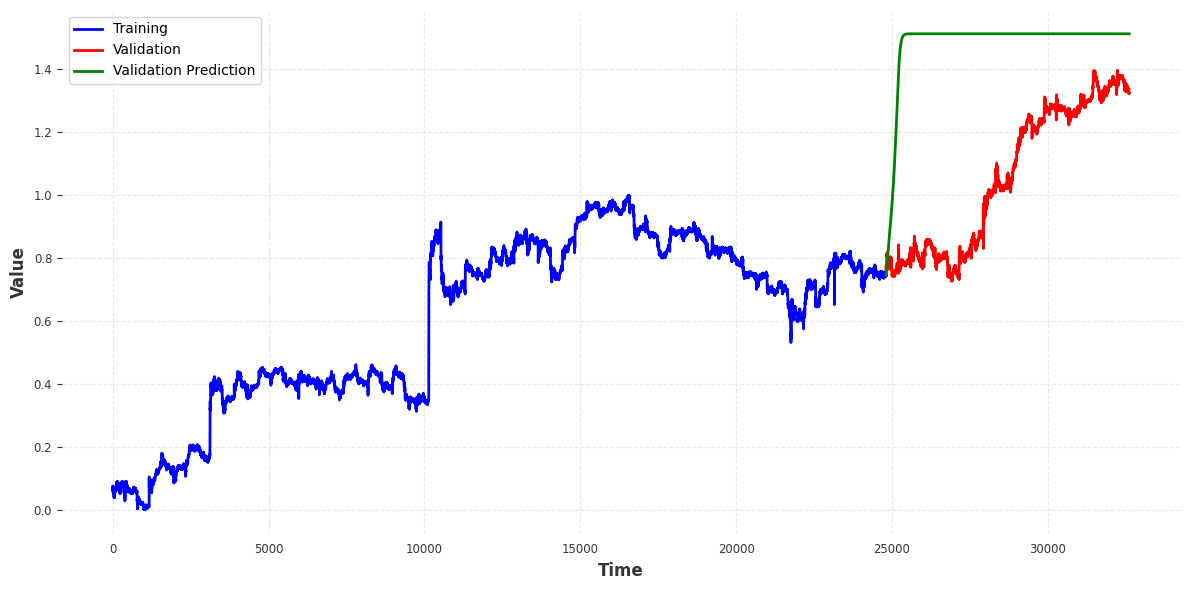

In [54]:
plot_series(
    [
        train.pd_series(),                      
        (val.pd_series(), train.pd_series().shape[0]),                                  
        ([preds.pd_series()], 'overlapping', train.pd_series().shape[0]) 
    ],
    colors=['blue', 'red', 'green'],
    labels=['Training', 'Validation', 'Validation Prediction']
)

In [55]:
evaluate(val, preds)

D:\TimeSeries\StockTimeSeries\.timeenv\Lib\site-packages\darts\metrics\metrics.py:991: RuntimeWarning: Mean of empty slice
  return np.nanmean(
D:\TimeSeries\StockTimeSeries\.timeenv\Lib\site-packages\darts\metrics\metrics.py:372: RuntimeWarning: Mean of empty slice
  vals = component_reduction(vals, axis=COMP_AX)
D:\TimeSeries\StockTimeSeries\.timeenv\Lib\site-packages\darts\metrics\metrics.py:1404: RuntimeWarning: Mean of empty slice
  return np.nanmean(
D:\TimeSeries\StockTimeSeries\.timeenv\Lib\site-packages\darts\metrics\metrics.py:2222: RuntimeWarning: Mean of empty slice
  return np.nanmean(
D:\TimeSeries\StockTimeSeries\.timeenv\Lib\site-packages\darts\metrics\metrics.py:2528: RuntimeWarning: Mean of empty slice
  return np.nanmean(


{'MAE': nan, 'RMSE': nan, 'MAPE': nan, 'SMAPE': nan}

In [24]:
val.shape

(7800, 1, 1)

<Axes: xlabel='time'>

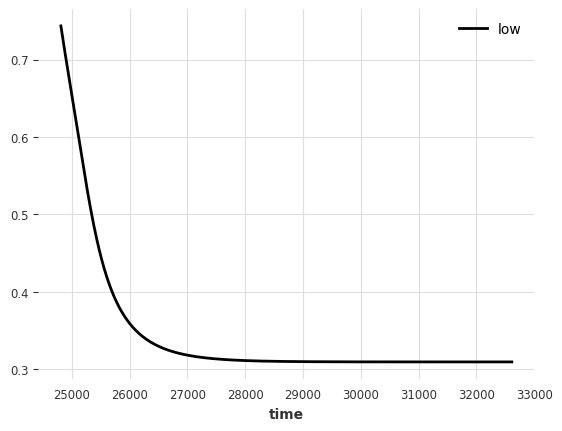

In [28]:
preds.plot()